In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pydae.plot_tools import set_style
import pydae.ssa as ctrl
colors = set_style(plt)

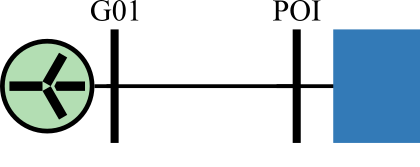<img src="./png/wind_farm.png" width="800">



In [3]:
import wf1vsgll 

In [6]:
model = wf1vsgll.model()
model.report_u()
model.report_params()

model.ini({'b_G01_POI':-10},'xy_0.json')
model.report_x()
model.report_y()

P_G01 = 0.00
Q_G01 = 0.00
P_POI = 0.00
Q_POI = 0.00
v_dc_G01 = 1.20
p_l_G01 = 0.00
q_l_G01 = 0.00
p_r_G01 = 0.00
q_r_G01 = 0.00
v_ref_G01 = 1.00
Ddelta_ff_G01 = 0.00
Domega_ff_G01 = 0.00
alpha_POI = 0.00
v_ref_POI = 1.00
omega_ref_POI = 1.00
delta_ref_POI = 0.00
phi_POI = 0.00
S_base =100000000.00
g_G01_POI = 0.00
b_G01_POI =-200.00
bs_G01_POI = 0.00
U_G01_n =20000.00
U_POI_n =20000.00
S_n_G01 =10000000.00
F_n_G01 =50.00
X_s_G01 = 0.05
R_s_G01 = 0.01
A_l_G01 = 0.01
B_l_G01 = 0.01
C_l_G01 = 0.01
K_delta_G01 = 0.00
K_p_G01 = 0.00
K_i_G01 = 0.12
K_g_G01 = 0.00
R_v_G01 = 0.00
X_v_G01 = 0.30
K_q_G01 =10.00
T_q_G01 = 0.03
K_p_v_G01 = 0.00
K_i_v_G01 = 0.00
S_n_POI =100000000.00
F_n_POI =50.00
X_v_POI = 0.00
R_v_POI = 0.00
K_delta_POI = 0.00
K_alpha_POI = 0.00
K_p_agc = 0.00
K_i_agc = 0.00
K_xif = 0.01
m_f_G01 =  0.83
delta_G01 = -0.00
x_v_G01 = -0.00
e_qm_G01 =  0.00
xi_v_G01 = -0.00
delta_POI =  0.00
Domega_POI =  0.00
xi_freq =  0.00
V_G01 =  1.00
theta_G01 =  0.00
V_POI =  1.00
theta_POI =

## Design and steady state

In [424]:
model = wf1vsgll.model()

# Powers
S_base = 100e6
S_n_POI = 1000e6
S_n_G01 = 100e6

p_G01_MW = 0
q_G01_Mvar = 0
P_G01 =  0e6
Q_G01 =  0e6

# grid
R_g = 0.0
X_g = 0.1
Z_g = (R_g + 1j*X_g)
Y_g = 1.0/Z_g 
g_G01_POI = Y_g.real
b_G01_POI = Y_g.imag

# VSG design
X_s = 0.1
R_s = 0.01
zeta = 0.8 # 1.0/np.sqrt(2) 
H_v = 5.0 
WB = 2 *np.pi* 50;
R_v = 0.0
X_v = 0.2
P_max = 1/(X_v+X_s)
fn = np.sqrt(WB*P_max/(2*H_v))/(2*np.pi)
Dp = 0;
K_i = (2*np.pi*fn)**2/(WB*P_max);
K_g = Dp*K_i;
K_p = (2*zeta*2*np.pi*fn - K_g)/(WB*P_max);
T_q = 1.0/(2*np.pi*10/2)
K_q = (1.0 - 0.0)/(1.05 - 0.95)
K_i_q = 1e-6


params = {
    "S_base":S_base,
    "K_p_agc":0.0,"K_i_agc":0.0,"K_xif":1e-4, # secondary freq. is removed
    'g_G01_POI':g_G01_POI,'b_G01_POI':b_G01_POI,
    "S_n_POI":S_n_POI,"v_ref_POI":1.0,"K_delta_POI":0.01,"K_alpha_POI":1e-8,
    "S_n_G01":S_n_G01,
    "p_r_G01":0*p_G01_MW*1e6/S_n_G01,"q_r_G01":0*q_G01_Mvar*1e6/S_n_G01,
    "P_G01":P_G01,"Q_G01":Q_G01,
    'R_v_G01':R_v-R_s,'X_v_G01':X_v-X_s,
    'R_s_G01':R_s,'X_s_G01':X_s,
    'K_p_G01':K_p,'K_i_G01':K_i,'K_g_G01':K_g,'K_q_G01':K_q,'T_q_G01':T_q
}

model.ini(params,'xy_0.json')
model.report_x()
model.report_y()

m_f_G01 =  0.83
delta_G01 =  0.00
x_v_G01 =  0.00
e_qm_G01 = -0.00
xi_v_G01 =  0.00
delta_POI =  0.00
Domega_POI =  0.00
xi_freq =  0.00
V_G01 =  1.00
theta_G01 =  0.00
V_POI =  1.00
theta_POI =  0.00
i_si_G01 =  0.00
i_sr_G01 =  0.00
p_s_G01 =  0.00
q_s_G01 = -0.00
p_dc_G01 =  0.01
v_td_ref_G01 =  0.00
v_tq_ref_G01 =  1.00
e_vq_G01 =  1.00
m_G01 =  0.83
theta_t_G01 =  0.00
omega_POI =  1.00
i_d_POI = -0.00
i_q_POI = -0.00
p_s_POI = -0.00
q_s_POI =  0.00
omega_coi =  1.00
p_agc =  0.00


## Small signal analysis

In [425]:
ctrl.A_eval(model)
ctrl.damp_report(model)

,Real,Imag,Freq.,Damp
Mode 1,-1.000000e+00,0.000000,0.000000,1.000000
Mode 2,-1.000000e-04,0.000000,0.000000,1.000000
Mode 3,-8.183886e+00,6.140755,0.977332,0.799867
Mode 4,-8.183886e+00,-6.140755,0.977332,0.799867
Mode 5,-1.078265e+03,0.000000,0.000000,1.000000
Mode 6,-9.999996e-03,0.000000,0.000000,1.000000
Mode 7,-9.718351e-08,0.000000,0.000000,1.000000
Mode 8,-1.000000e-08,0.000000,0.000000,1.000000


In [434]:
def pq2ea(p_ref,q_ref,v,X_vs,X_g):
    X_pu = X_vs 
    e =  (X_pu*q_ref + v**2)/(2*v) + np.sqrt(4*X_pu**2*p_ref**2 + X_pu**2*q_ref**2 + 2*X_pu*q_ref*v**2 + v**4)/(2*v)
    delta = (X_vs + X_g)*p_ref/(e*v)
    return delta,e 

model_1 = wf1vsgll.model()
model_2 = wf1vsgll.model()

X_g_pum = X_g*S_n_G01/S_base # pu-machine base
params.update({'p_l_G01':0.0,'q_l_G01':0.0,'v_ref_G01':1.0+0.5*X_g_pum})
model_1.ini(params,'xy_0.json')
model_2.ini(params,'xy_0.json')

X_v,X_s = model_2.get_mvalue(['X_v_G01','X_s_G01'])
X_vs = X_v + X_s # pu-machine base

model_1.Dt =0.001
model_2.Dt =0.001

Dt_mid = 0.005
times = np.arange(0,10,Dt_mid)

T_w = 5
params_ctrl_1 = {}
params_ctrl_2 = {}

x_delta_ff = 0.0
for t in times:
    
    # references and perturbations
    p_ref = 0.0
    q_ref = 0.0
    if t>1.0:
        p_ref =  0.8+0.0*np.sin(2*np.pi*1*t)
    if t>2.0:
        q_ref = -0.5

    if t>4.0:
        q_ref = 0.2
        
    alpha_POI = 0.0
    if t>3.0:
        alpha_POI = -0.01
    if t>5.0:
        alpha_POI = 0.0
    
    # model 2: feed foreward
    # observations   
    v_s = model_2.get_value(['V_G01','theta_G01','delta_G01','delta_ff_G01'])

    ## feed foreward
    Ddelta_ref,e = pq2ea(p_ref,q_ref,v,X_vs,X_g_pum)    
   
    ## lead-lag
    x_delta_ff += Dt_mid/T_w*(Ddelta_ref - x_delta_ff)
    Ddelta = Ddelta_ref - x_delta_ff
    
    params_ctrl_1.update({'Ddelta_ff_G01':0.0, 'p_r_G01':p_ref, 'q_r_G01':q_ref,'alpha_POI':alpha_POI}) 
    params_ctrl_2.update({'Ddelta_ff_G01':Ddelta, 'p_r_G01':p_ref, 'q_r_G01':q_ref,'alpha_POI':alpha_POI}) 

    model_1.run(t,params_ctrl_1)
    model_2.run(t,params_ctrl_2)
    
model_1.post()
model_2.post()

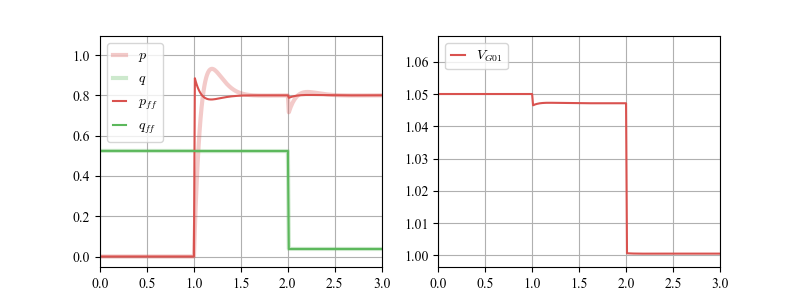

In [435]:
plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8, 3), frameon=False, dpi=100, squeeze=False)

axes[0,0].plot(model_1.Time, model_1.get_values('p_s_G01'), label="$p$", color=colors[0], lw=3, alpha=0.3)
axes[0,0].plot(model_1.Time, model_1.get_values('q_s_G01'), label="$q$", color=colors[1], lw=3, alpha=0.3)

axes[0,0].plot(model_2.Time, model_2.get_values('p_s_G01'), label="$p_{ff}$", color=colors[0])
axes[0,0].plot(model_2.Time, model_2.get_values('q_s_G01'), label="$q_{ff}$", color=colors[1])


axes[0,1].plot(model_2.Time, model_2.get_values('V_G01'), label="$V_{G01}$")

for ax in axes.flatten(): 
    ax.legend(ncol=1,loc='upper left')
    ax.grid()
    ax.set_xlim(0,3)

In [382]:
model.get_values('V_G01')

array([0., 0., 0., ..., 0., 0., 0.])

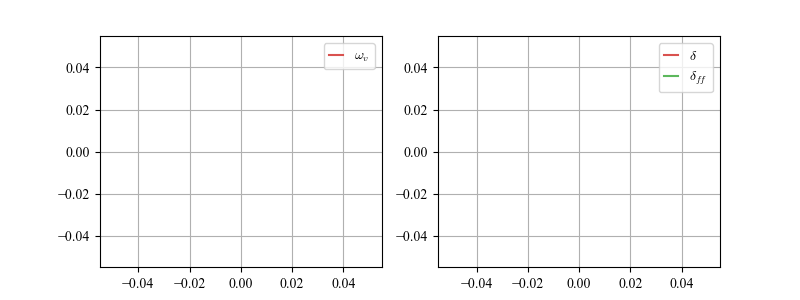

In [326]:
plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8, 3), frameon=False, dpi=100, squeeze=False)

axes[0,0].plot(model.Time, model.get_values('omega_v_G01'), label="$\omega_v$")
axes[0,1].plot(model.Time, model.get_values('delta_G01'), label="$\delta$")
axes[0,1].plot(model.Time, model.get_values('delta_ff_G01'), label="$\delta_{ff}$")


for ax in axes.flatten(): 
    ax.legend()
    ax.grid()

## Time domain simulation

### Remote reference power tracking

In [14]:
model.ini(params,'xy_0.json')
model.run(1.0,{})
model.run(3.0,{'p_r_G01':0.5})
model.run(4.0,{'q_r_G01':0.4})
model.run(5.0,{})

model.post();

### Feed foreward

In [15]:
params.update({'Ddelta_ff_G01':0.0,
               'p_l_G01':0.8,'v_ref_G01':1.002,
               'p_r_G01':0.0,'q_r_G01':0.0})
model.ini(params,'xy_0.json')

# p = e_v*v_s/(X_v + X_s)*sin(delta - theta_s)
# q = e_v*v_s/(X_v + X_s)*cos(delta - theta_s) - v_s**2/(X_v + X_s)
#q = e_v*v_s/(X_v + X_s)*(1-delta**2) - v_s**2/(X_v + X_s)
# delta = -np.sqrt((Dq + v_s**2/(X_v + X_s))/(e_v*v_s/(X_v + X_s))-1.0)
# q \approx e_v*v_s/(X_v + X_s) - v_s**2/(X_v + X_s) = v_s*(e_v-v_s)/(X_v + X_s)
# De_v = Dq*(X_v + X_s)/v_s
# Ddelta = -De_v 
e_v,R_v,X_v,X_s = model.get_mvalue(['e_vq_G01','R_v_G01','X_v_G01','X_s_G01'])
v_s, theta_s = model.get_mvalue(['V_G01','theta_G01'])

Dp = 0.0
Ddelta_1 = Dp*(X_v + X_s)/(e_v*v_s) 
print(Ddelta)
#Ddelta = 0.037070509506286875
model.run(1.0,{})
model.run(3.0,{'Ddelta_ff_G01':Ddelta_1, 'p_r_G01':Dp})

e_v,R_v,X_v,X_s = model.get_mvalue(['e_vq_G01','R_v_G01','X_v_G01','X_s_G01'])
v_s, theta_s,delta = model.get_mvalue(['V_G01','theta_G01','delta_G01'])
Dq = 0.2

# proposal 1
X_pu = X_s + X_v + X_g*S_n_G01/S_base
De_v_est = Dq*(X_v + X_s)/e_v
Ddelta_q = -De_v*(X_v + X_s) 

# proposal 2
De_v_est = Dq*X_pu/(v_s*(delta**2 - 1))
De_v_est = Dq*X_pu/e_v
Ddelta_q = ((e_v*delta/(e_v+De_v_est) - delta))

#Ddelta_2 = -0.006460000000000021

model.run(4.0,{'q_r_G01':Dq,'Ddelta_ff_G01':Ddelta_q})
model.run(5.0,{})

model.post();

delta_exp = model.get_values('delta_G01')[-1]-model.get_values('delta_G01')[0]
delta_exp

NameError: name 'Ddelta' is not defined

In [ ]:
plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8, 3), frameon=False, dpi=100, squeeze=False)

axes[0,0].plot(model.Time, model.get_values('p_s_G01'), label="$p_{G01}$")
axes[0,0].plot(model.Time, model.get_values('q_s_G01'), label="$q_{G01}$")

axes[0,1].plot(model.Time, model.get_values('V_G01'), label="$V_{G01}$")

for ax in axes.flatten(): 
    ax.legend()

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(7, 5), frameon=False, dpi=100, squeeze=False)

axes[0,0].plot(model.Time, model.get_values('omega_v_G01'), label="$\omega_v$")
axes[0,1].plot(model.Time, model.get_values('delta_G01'), label="$\delta$")
axes[1,0].plot(model.Time, model.get_values('theta_G01'), label="$\\theta_{s}$")
axes[1,1].plot(model.Time, model.get_values('e_vq_G01'), label="$e_v$")

for ax in axes.flatten(): 
    ax.legend()

In [16]:
De_v =  model.get_values('e_vq_G01')[0]-model.get_values('e_vq_G01')[-1]
De_v

-0.083001014838185

In [17]:
X_pu = X_s + X_v + 0*X_g*S_n_G01/S_base
delta = model.get_values('delta_G01')[0]
De_v_est = Dq*X_pu/(v_s*(delta**2 - 1))
De_v_est

NameError: name 'Dq' is not defined

p_1 = e*v/X*delta
p_2 = (e+De)*v*(delta+Ddelta)
p_1 = p_2
e*v/X*delta = (e+De)*v/X*(delta+Ddelta)
e*delta = (e+De)*(delta+Ddelta)
Ddelta = e*delta/(e+De) - delta

In [18]:
Ddelta =  model.get_values('delta_G01')[0]-model.get_values('delta_G01')[-1]
Ddelta

-0.09242319257354906

In [19]:
delta =  model.get_values('delta_G01')[0]
Ddelta_q = e_v*delta/(e_v+De_v_est) - delta
Ddelta_q

NameError: name 'De_v_est' is not defined

In [20]:
e_v

4.642388578279219

In [21]:
import sympy as sym
e_v,v_s,X_pu,Dp,Dq,delta,De_v = sym.symbols('e_v,v_s,X_pu,Dp,Dq,delta,De_v', real= True)
q = e_v*v_s/(X_pu)*(1-delta**2) - v_s**2/(X_pu)
sym.solve(sym.diff(q,e_v)*De_v-Dq,De_v)


[-Dq*X_pu/(v_s*(delta**2 - 1))]

In [277]:
import sympy as sym
e,v,X_pu,p_ref,q_ref,delta = sym.symbols('e,v,X_pu,p_ref,q_ref,delta', real= True)
eq_p = -p_ref + e*v/X_pu*sym.sin(delta)
eq_q = -q_ref + e*v/X_pu*sym.cos(delta) - v**2/X_pu
sol = sym.solve([eq_p,eq_q],[delta,e])



In [281]:
import sympy as sym
e,v,X_pu,p_ref,q_ref,delta = sym.symbols('e,v,X_pu,p_ref,q_ref,delta', real= True)
eq_p = -p_ref + e*v/X_pu*delta
eq_q = -q_ref + e*v/X_pu*(1 - delta**2) - v**2/X_pu
sol = sym.solve([eq_p,eq_q],[delta,e])

delta_est = sol[1][0]
e_est = sol[1][1]

str(sym.simplify(delta_est))

'(-X_pu*q_ref - v**2 + sqrt(4*X_pu**2*p_ref**2 + X_pu**2*q_ref**2 + 2*X_pu*q_ref*v**2 + v**4))/(2*X_pu*p_ref)'

In [296]:
X_pu = 0.3
p_ref = -1.0
q_ref = 0.0
v = 1.0

print(f'-X_pu*q_ref = {-X_pu*q_ref}')
print(f'- v**2 = {- v**2}')
print(f'sqrt(4*X_pu**2*p_ref**2 + X_pu**2*q_ref**2 + 2*X_pu*q_ref*v**2 + v**4) = {np.sqrt(4*X_pu**2*p_ref**2 + X_pu**2*q_ref**2 + 2*X_pu*q_ref*v**2 + v**4)}')
print(f'4*X_pu**2*p_ref**2 = {4*X_pu**2*p_ref**2}')
print(f'X_pu**2*q_ref**2 = {X_pu**2*q_ref**2}')
print(f'2*X_pu*q_ref*v**2 = {2*X_pu*q_ref*v**2}')
print(f'v**4 = {v**4}')

-X_pu*q_ref = -0.0
- v**2 = -1.0
sqrt(4*X_pu**2*p_ref**2 + X_pu**2*q_ref**2 + 2*X_pu*q_ref*v**2 + v**4) = 1.16619037896906
4*X_pu**2*p_ref**2 = 0.36
X_pu**2*q_ref**2 = 0.0
2*X_pu*q_ref*v**2 = 0.0
v**4 = 1.0


In [290]:
X_pu**2

0.09

In [178]:
e_v,R_v,X_v,X_s = model.get_mvalue(['e_vq_G01','R_v_G01','X_v_G01','X_s_G01'])
v_s, theta_s = model.get_mvalue(['V_G01','theta_G01'])
delta = 0.0
Dq = 0.1
De_v = v_s*(1 - delta**2)/(X_s + X_v)*Dq


In [179]:
(-Dq*X_s - Dq*X_v + v_s)/v_s

0.9800764699558847

### Relations

In [180]:

params.update({'b_G01_POI':-5,
               'p_l_G01':0.0,'q_l_G01':0.0,
               'p_r_G01':0.0,'q_r_G01':0.0,
               'v_ref_G01':1,'A_l_G01':0.0,'B_l_G01':0.0,'C_l_G01':0.0})
model.ini({},'xy_0.json')
model.ini({},1)
model.report_x()
model.report_u()

m_f_G01 =  0.96
delta_G01 =  0.21
x_v_G01 = -0.00
e_qm_G01 = -0.01
xi_v_G01 = 121486.74
delta_POI =  0.00
Domega_POI = -0.00
xi_freq =  0.00
P_G01 =100000000.00
Q_G01 = 0.00
P_POI = 0.00
Q_POI = 0.00
v_dc_G01 = 1.20
p_l_G01 = 0.00
q_l_G01 = 0.00
p_r_G01 = 1.00
q_r_G01 = 0.50
v_ref_G01 = 1.00
Ddelta_ff_G01 = 0.07
Domega_ff_G01 = 0.00
alpha_POI = 0.00
v_ref_POI = 1.00
omega_ref_POI = 1.00
delta_ref_POI = 0.00
phi_POI = 0.00


In [181]:
params={}
S_n_G01 = 10.0e6
S_base  = 10.0e6
X_g = 0.01

p_ref = 1.0

params.update({'p_l_G01':p_ref,'q_l_G01':0.0,'A_l_G01':0.0,'B_l_G01':0.0,'C_l_G01':0.0, 
               'b_G01_POI':-1/X_g, 'S_n_G01':S_n_G01, 'S_base':S_base})
model.ini(params,'xy_0.json')


v_refs = np.arange(0.99,1.01,0.001)
p_ss = np.copy(v_refs)
q_ss = np.copy(v_refs)
v_ss = np.copy(v_refs)
e_vs = np.copy(v_refs)
deltas = np.copy(v_refs)
theta_ss = np.copy(v_refs)

for it,v_ref in enumerate(v_refs):
    Ddelta = 0.0
    params.update({'Ddelta_ff_G01':Ddelta, 'p_r_G01':p_ref, 'v_ref_G01':v_ref}) 
    model.ini(params,'xy_0.json')
    
    # observations   
    e_v,R_v,X_v,X_s = model.get_mvalue(['e_vq_G01','R_v_G01','X_v_G01','X_s_G01'])
    v_s, theta_s, delta, delta_ff = model.get_mvalue(['V_G01','theta_G01','delta_G01','delta_ff_G01'])
    p_s, q_s = model.get_mvalue(['p_s_G01','q_s_G01'])
    p_ss[it] = p_s
    q_ss[it] = q_s
    e_vs[it] = e_v
    v_ss[it] = v_s
    deltas[it] = delta
    theta_ss[it] = theta_s



### e_v estimation

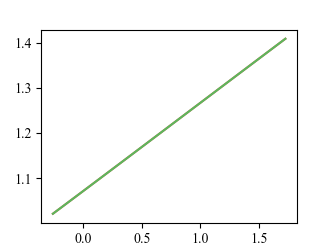

In [182]:
fig, axes = plt.subplots()

axes.plot(q_ss,e_vs)

# e_v estimation
# q_s = e_v*v_s/X_pu*cos(deltas - theta_s) - v_s**2/X_pu
X_pu = X_v + X_s # + X_g*S_n_G01/S_base 

#e_vs_est = v_ss*(1 - deltas**2)*X_pu*q_ss + v_ss
e_vs_est = (q_ss + v_ss**2/X_pu)/(v_ss/X_pu*np.cos(deltas - theta_ss)) # full estimation v_s side
#e_vs_est = X_pu*q_ss + v_ss 

axes.plot(q_ss,e_vs_est)

### $\delta$ estimation

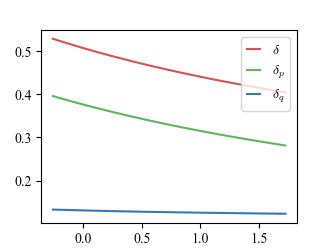

In [183]:
fig, axes = plt.subplots()

deltas # part of delta is due to p and another is because of q
delta_p = p_ss*X_pu/(e_vs*v_ss)   # part of delta is due to p 
delta_q = deltas - delta_p
axes.plot(q_ss,deltas, label='$\delta$') 
axes.plot(q_ss,delta_p, label='$\delta_p$')  
axes.plot(q_ss,delta_q, label='$\delta_q$')  

# delta_q estimation
#X_pu = X_v + X_s + 0*X_g*S_n_G01/S_base 
De_v_est = e_vs_est - 1.0
delta_q_est = (1*(deltas-theta_ss)/(1+De_v_est)) - (deltas-theta_ss)  # here the part of delta because of q should be obtained

#Çaxes.plot(q_ss,delta_q_est, label='$\hat \delta_q$')
#axes.plot(q_ss,deltas_est, label='$\hat \delta$')
axes.legend()


In [184]:
De_v_est

array([0.02114992, 0.0400172 , 0.05895355, 0.07795535, 0.09701926,
       0.11614214, 0.13532105, 0.15455324, 0.17383614, 0.19316732,
       0.21254453, 0.23196563, 0.2514286 , 0.27093157, 0.29047277,
       0.31005051, 0.32966321, 0.34930939, 0.36898765, 0.38869664,
       0.40843511])

In [185]:
delta = 1.0
e = 1.0
De = 0.1

# delta*e = (delta+Ddelta)*(e+De)
# Ddelta = delta*e/(e+De) - delta

Ddelta = (e*delta/(e+De)) - delta 
print(Ddelta)
(delta+Ddelta)*(e+De)

-0.09090909090909094


1.0

#### Time domain test

In [220]:
1.01**4

1.04060401

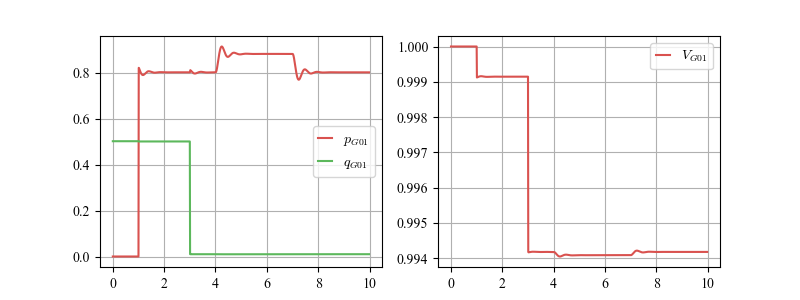

In [233]:
plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8, 3), frameon=False, dpi=100, squeeze=False)

axes[0,0].plot(model.Time, model.get_values('p_s_G01'), label="$p_{G01}$")
axes[0,0].plot(model.Time, model.get_values('q_s_G01'), label="$q_{G01}$")

axes[0,1].plot(model.Time, model.get_values('V_G01'), label="$V_{G01}$")

for ax in axes.flatten(): 
    ax.legend()
    ax.grid()

In [240]:
params.update({'alpha_POI':0.0})
model.ini(params,'xy_0.json')
model.run(1.0,{})
model.run(4.0,{'alpha_POI':-0.01})
model.run(7.0,{'alpha_POI':0.0})
model.run(10.0,{})
model.post();

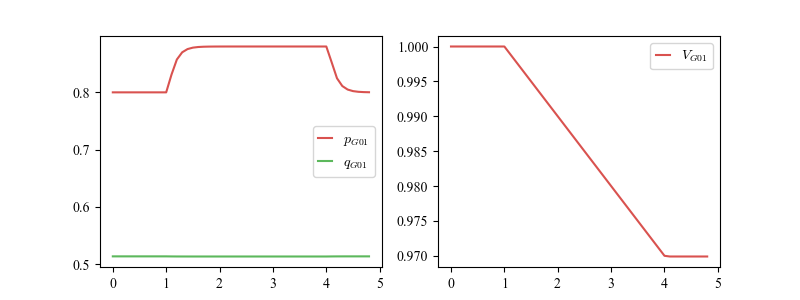

In [241]:
plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8, 3), frameon=False, dpi=100, squeeze=False)

axes[0,0].plot(model.Time, model.get_values('p_s_G01'), label="$p_{G01}$")
axes[0,0].plot(model.Time, model.get_values('q_s_G01'), label="$q_{G01}$")

#axes[0,1].plot(model.Time, model.get_values('V_G01'), label="$V_{G01}$")
axes[0,1].plot(model.Time, model.get_values('omega_coi'), label="$V_{G01}$")

for ax in axes.flatten(): 
    ax.legend()

In [12]:
model.report_y()

V_G01 =  1.00
theta_G01 =  0.10
V_POI =  1.00
theta_POI =  0.00
i_si_G01 = -0.05
i_sr_G01 =  0.01
p_s_G01 = -0.00
q_s_G01 =  0.05
p_dc_G01 =  0.01
v_td_ref_G01 = -0.00
v_tq_ref_G01 =  1.01
e_vq_G01 =  1.01
m_G01 =  0.84
theta_t_G01 =  0.10
omega_POI =  0.97
i_d_POI =  0.01
i_q_POI = -0.10
p_s_POI = -0.10
q_s_POI =  0.01
omega_coi =  0.97
p_agc =  0.00
